# Projekat iz mašinskog učenja 1 (procena cena kuća)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('src')

from src.data_loader import load_data, explore_data, create_correlation_plot, select_features_by_correlation
from src.preprocessor import preprocess_data, split_data, scale_data
from src.pca_analyzer import apply_pca
from src.model_trainer import train_models, plot_cv_results
from src.evaluator import evaluate_final_models, display_results_table, plot_final_results
from src.analyzer import analyze_predictions

plt.style.use('default')
sns.set_palette("husl")

## 1. Učitavanje podataka

In [2]:
data = load_data("dataset/kc_house_data.csv")

Uspešno učitani podaci iz dataset/kc_house_data.csv
Oblik dataseta: (21613, 21)
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## 2. Eksplorativna analiza podataka


Tipovi podataka:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Osnovne statistike za cenu:
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Nedostajuće vrednosti:
Nema nedostajućih vrednosti!


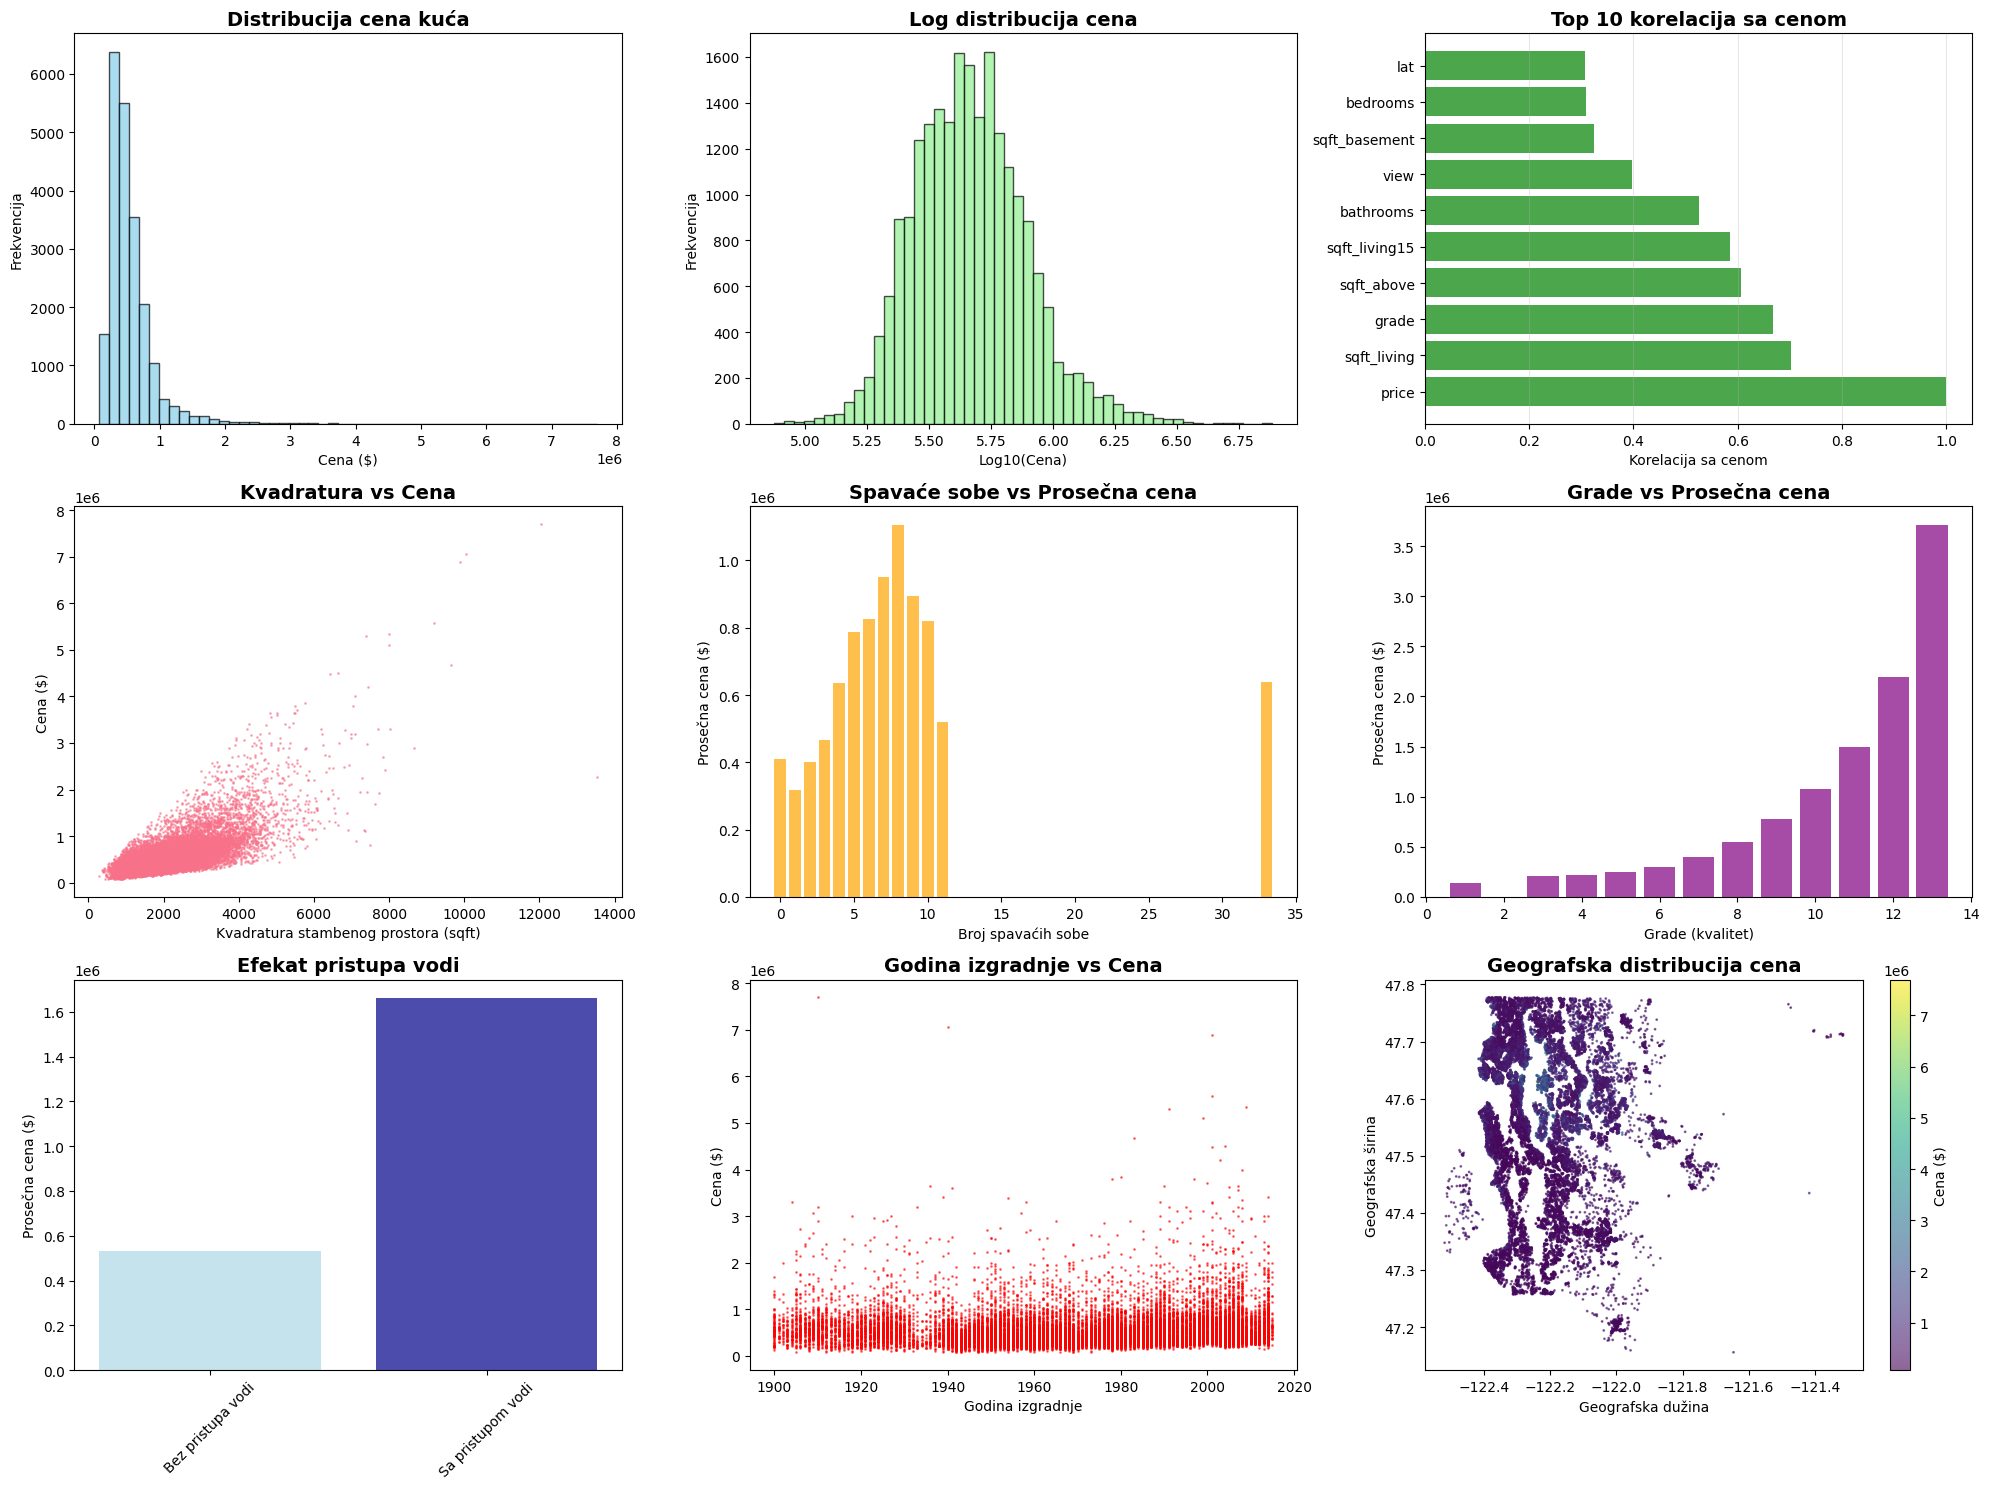


CENOVNE STATISTIKE:
Najjeftinija kuća: $75,000.00
Najskuplja kuća: $7,700,000.00
Prosečna cena: $540,088.14
Medijana cene: $450,000.00

KARAKTERISTIKE KUĆA:
Prosečna kvadratura: 2080 sqft
Prosečan broj spavaćih soba: 3.4
Prosečan broj kupatila: 2.1
Kuće sa pristupom vodi: 0.8%


In [3]:
if data is not None:
    explore_data(data)

## 3. Priprema podataka

In [4]:
if data is not None:
    # Uklanjanje suvišnih kolona + feature engineering
    df_processed = preprocess_data(data)

Uklonjene kolone: ['id', 'date']
Kreirano 5 novih feature-a: ['house_age', 'is_renovated', 'basement_ratio', 'is_large_house', 'luxury_score']


## 4. Korelaciona matrica

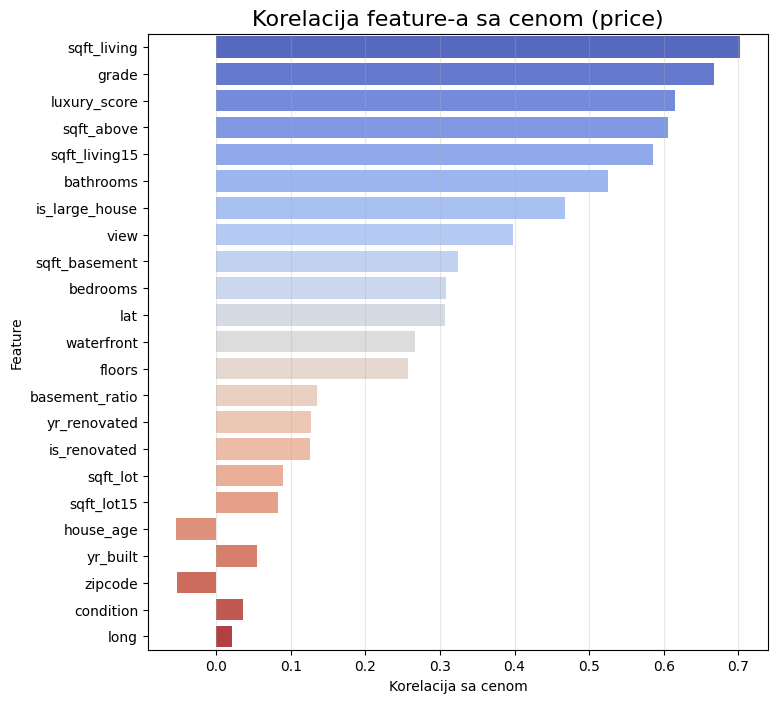

In [5]:
if df_processed is not None:
    price_corr = create_correlation_plot(df_processed)

## 5. Selekcija feature-a na osnovu korelacije

In [6]:
CORELATION_LIMIT = 0.59

if df_processed is not None:
    selected_df = select_features_by_correlation(df_processed, CORELATION_LIMIT)
    display(selected_df.head())

Feature-i sa |korelacijom| >= 0.59: 
['sqft_living', 'grade', 'luxury_score', 'sqft_above']

Izbačene kolone: 
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'is_renovated', 'basement_ratio', 'is_large_house']

Oblik novog dataframe-a za učenje: (21613, 5)


,sqft_living,grade,luxury_score,sqft_above,price
0,1180,7,0,1180,221900.0
1,2570,7,0,2170,538000.0
2,770,6,0,770,180000.0
3,1960,7,0,1050,604000.0
4,1680,8,0,1680,510000.0


## 6. Podela podataka na Train/Test i njihovo skaliranje

In [7]:
X = selected_df.drop('price', axis=1)
y = selected_df['price'] # target

# Podela na train/test (85%/15%)
X_train, X_test, y_train, y_test = split_data(X, y)

# Skaliranje podataka
X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test)


PODELA PODATAKA:
Train set: 18371 uzoraka (85.0%)
Test set: 3242 uzoraka (15.0%)

Skalirani su podaci


## 7. PCA analiza

Originalan broj feature-a: 4
Broj komponenti nakon PCA: 3
Objašnjena varijansa: 0.970 (97.0%)


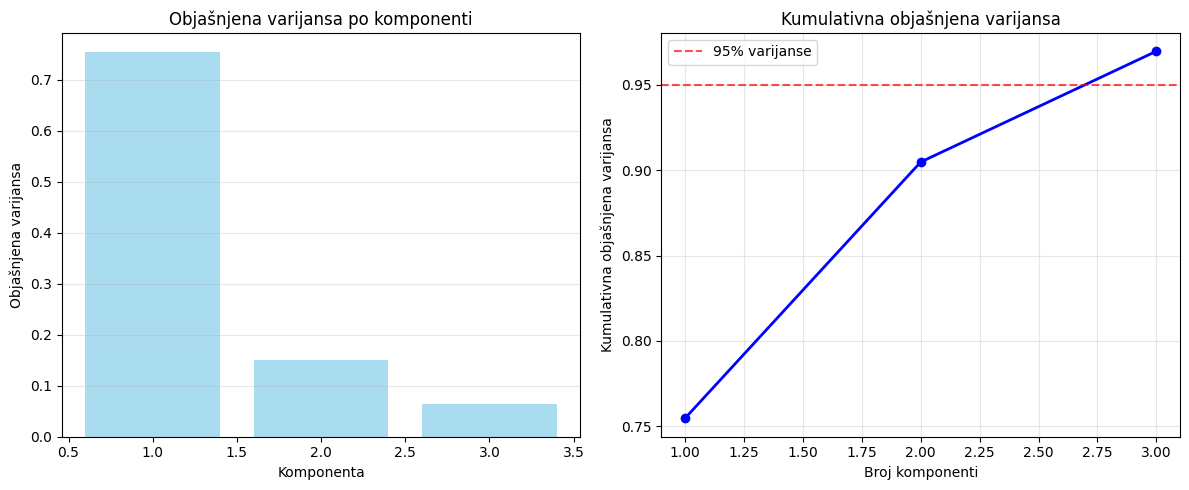


NAJVAŽNIJI FEATURE-I ZA PRVE 3 KOMPONENTE:

Komponenta 1:
  1. sqft_living: 0.532
  2. sqft_above: 0.525
  3. grade: 0.518
  4. luxury_score: 0.416

Komponenta 2:
  1. luxury_score: 0.879
  2. sqft_above: -0.370
  3. sqft_living: -0.299
  4. grade: -0.024

Komponenta 3:
  1. grade: 0.855
  2. sqft_living: -0.341
  3. sqft_above: -0.318
  4. luxury_score: -0.226

PCA TRANSFORMACIJA:
Originalno: 4 feature-a
Nakon PCA: 3 komponenti


In [8]:
if selected_df is not None:
    X_train_pca, X_test_pca, pca = apply_pca(X_train_scaled, X_test_scaled, X_train)

    print(f"\nPCA TRANSFORMACIJA:")
    print(f"Originalno: {X_train_scaled.shape[1]} feature-a")
    print(f"Nakon PCA: {X_train_pca.shape[1]} komponenti")

## 8. Treniranje modela

In [9]:
if selected_df is not None:
    results = train_models(X_train_scaled, X_train_pca, y_train)
    
    print(f"\nMODELI TRENIRANI NA:")
    print(f"Originalni (skalirani) feature-i: {X_train_scaled.shape[1]} feature-a")
    print(f"PCA komponente: {X_train_pca.shape[1]} komponenti")
    print(f"Ukupno uzoraka za treniranje: {X_train_scaled.shape[0]}")


Treniranje Linear Regression...
Cross-validation evaluacija...
Linear Regression - Završeno!
CV MSE (Original): 53,570,800,836 ± 7,107,930,609
CV MSE (PCA): 57,194,658,508 ± 7,202,542,550
CV R² (Original): 0.593 ± 0.022
CV R² (PCA): 0.566 ± 0.022

Treniranje Random Forest...
  🔍 Pretraga hiperparametara (originalni prostor)...
  🔍 Pretraga hiperparametara (PCA prostor)...
Cross-validation evaluacija...
Random Forest - Završeno!
CV MSE (Original): 48,891,124,512 ± 7,022,536,636
CV MSE (PCA): 50,406,965,119 ± 4,918,923,677
CV R² (Original): 0.629 ± 0.028
CV R² (PCA): 0.616 ± 0.021

Treniranje SVR...
  🔍 Pretraga hiperparametara (originalni prostor)...


KeyboardInterrupt: 

## 9. Vizualizacija

In [ ]:
if selected_df is not None:
    plot_cv_results(results)

## 10. Evaluacija na test skupu

In [ ]:
if selected_df is not None:
    final_results = evaluate_final_models(results, X_test_scaled, X_test_pca, y_test)
    
    print(f"\nFINALNA EVALUACIJA:")
    print(f"Test skup: {X_test_scaled.shape[0]} uzoraka")
    print(f"Feature-i (originalni): {X_test_scaled.shape[1]} skaliranih feature-a")
    print(f"Target: cene nekretnina")

## 11. Prikaz rezultata

In [ ]:
if selected_df is not None:
    display_results_table(final_results)
    plot_final_results(final_results)

## 12. Analiza najboljeg modela

In [ ]:
if selected_df is not None:
    best_model_name = max(final_results.keys(), key=lambda x: final_results[x]['test_r2'])
    best_result = final_results[best_model_name]
    
    print(f"\nNAJBOLJI MODEL: {best_model_name}")
    print(f"Test R²: {best_result['test_r2']:.3f}")
    print(f"Test RMSE: ${best_result['test_rmse']:,.0f}")
    print(f"Prostor: {best_result['space_type']}")
    print(f"Treniran na {X_train_scaled.shape[1]} originalnih feature-a ili {X_train_pca.shape[1]} PCA komponenti (prema izboru)")
    
    analyze_predictions(best_result, best_model_name, y_test)
    
    print(f"\nINFORMACIJE O FEATURE-IMA:")
    print(f"• Korelacijski limit: {CORELATION_LIMIT}")
    print(f"• Broj originalnih feature-a nakon pripreme: {X_train.shape[1]}")
    print(f"• Broj PCA komponenti: {X_train_pca.shape[1]}")

## 13. Zaključak

In [ ]:
if selected_df is not None:
    print("\nPREGLED REZULTATA:")
    print(f"Dataset: {selected_df.shape[0]} kuća sa {selected_df.shape[1]-1} odabranih numeričkih karakteristika (plus target)")
    print(f"Korelacijski limit: >= {CORELATION_LIMIT}")
    print(f"Originalni broj feature-a (skalirano): {X_train_scaled.shape[1]}")
    print(f"Broj PCA komponenti: {X_train_pca.shape[1]}")
    print(f"Smanjenje dimenzionalnosti (približno): {((X_train_scaled.shape[1] - X_train_pca.shape[1])/X_train_scaled.shape[1]*100):.1f}%")
    print(f"Najbolji model: {best_model_name}")
    print(f"Test R²: {best_result['test_r2']:.3f}")
    print(f"Test RMSE: ${best_result['test_rmse']:,.0f}")
    print(f"Predikcije u ±10%: {best_result['within_10_percent']:.1f}%")
    print(f"Korišćen prostor: {best_result['space_type']}")